# Bank Chrun Analysis Model Using Scikit-Learn

## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as ses
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,normalize
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,log_loss,balanced_accuracy_score
from sklearn.model_selection import validation_curve,learning_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image,Markdown,display
import pydotplus
import random
from subprocess import call
import scikitplot as skplt
import sys
import cgi
from time import sleep
%matplotlib inline

g:\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Preprocessing

## Getting information from CSV file

In [2]:
data_frame = pd.read_csv('Churn_Modelling.csv')
data_frame

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Seprating the Numerical_features and Catagorical_features

In [3]:
numerical_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
catagorical_features = ['Geography','Gender','HasCrCard','IsActiveMember']
numerical_features_data_set = data_frame[numerical_features]
catagorical_features_data_set=data_frame[catagorical_features]

## From the dataset the ratio of Chruned and Not-Chruned is

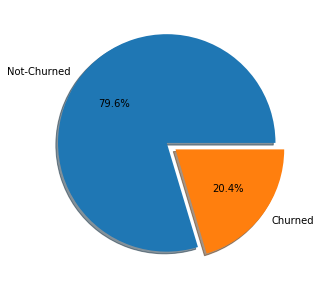

0    7963
1    2037
Name: Exited, dtype: int64

In [4]:
figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
ax_1.pie(data_frame['Exited'].value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
plt.show()
data_frame['Exited'].value_counts()

### Now as you can see that the dataset consist of highly varying numerical attributes 

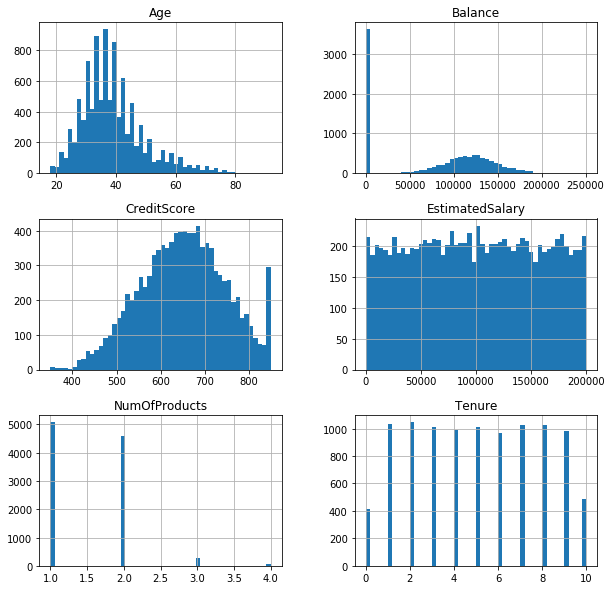

In [5]:
kwargs = dict(alpha=1, bins=50,figsize=(10,10))
data_frame[numerical_features].hist(**kwargs)
plt.show()

### Since the data features might not be enoughed for our classifier lets add more columns to it 
Make to more coloumns, we have taken CreditScore/No.of Products and Balance/CreditScore

In [6]:
numerical_features_data_set['CRS_to_PROD'] = numerical_features_data_set['CreditScore']/numerical_features_data_set['NumOfProducts']
numerical_features_data_set['BAL_to_CRS'] = numerical_features_data_set['Balance']/numerical_features_data_set['CreditScore']
numerical_features_data_set

g:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
g:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,CRS_to_PROD,BAL_to_CRS
0,619,42,2,0.00,1,101348.88,619.000000,0.000000
1,608,41,1,83807.86,1,112542.58,608.000000,137.841875
2,502,42,8,159660.80,3,113931.57,167.333333,318.049402
3,699,39,1,0.00,2,93826.63,349.500000,0.000000
4,850,43,2,125510.82,1,79084.10,850.000000,147.659788
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,385.500000,0.000000
9996,516,35,10,57369.61,1,101699.77,516.000000,111.181415
9997,709,36,7,0.00,1,42085.58,709.000000,0.000000
9998,772,42,3,75075.31,2,92888.52,386.000000,97.247811


# Now let's see the effect of numerical_features on Chrun

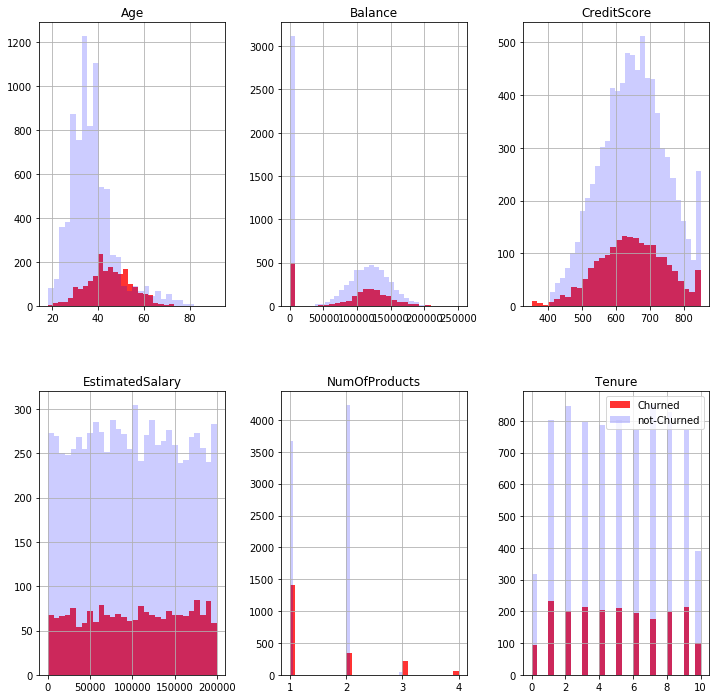

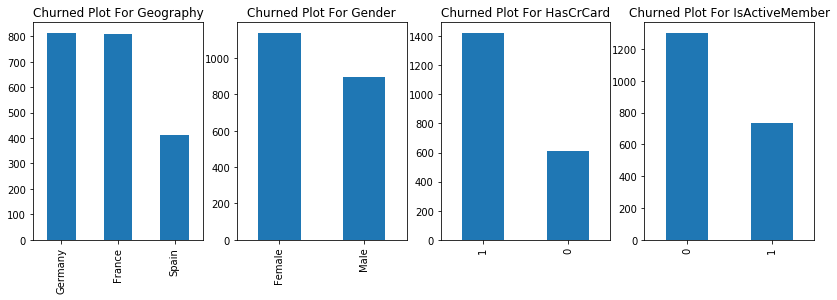

In [7]:
fig_new,ax_new =plt.subplots(2,3,figsize=(12,12))
data_frame[data_frame.Exited==1][numerical_features].hist(color='red',alpha=0.8,ax=ax_new,bins=30,label="Churned")
data_frame[data_frame.Exited==0][numerical_features].hist(color='blue',alpha=0.2,ax=ax_new,bins=30,label="not-Churned")
plt.legend()
plt.show()

feature = ['Geography','Gender','HasCrCard','IsActiveMember']
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
for i in range(4):
    
    data_frame[data_frame.Exited == 1][feature[i]].value_counts().plot(kind="bar", ax=ax[i]).set_title("Churned Plot For "+str(feature[i]))

Data contains string elements so we need to encode it to numerical ones before that lets seprate the target value from the dataset

In [8]:
y = data_frame['Exited']
data_frame = data_frame.drop(['RowNumber','CustomerId','Surname'],axis='columns')

In [9]:
Gender_dummy = pd.get_dummies(catagorical_features_data_set.Gender)
Geography_dummy = pd.get_dummies(catagorical_features_data_set.Geography)

In [10]:
final_data = pd.concat([numerical_features_data_set,Gender_dummy,Geography_dummy,catagorical_features_data_set.IsActiveMember,catagorical_features_data_set.HasCrCard],axis='columns') 
final_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,CRS_to_PROD,BAL_to_CRS,Female,Male,France,Germany,Spain,IsActiveMember,HasCrCard
0,619,42,2,0.00,1,101348.88,619.000000,0.000000,1,0,1,0,0,1,1
1,608,41,1,83807.86,1,112542.58,608.000000,137.841875,1,0,0,0,1,1,0
2,502,42,8,159660.80,3,113931.57,167.333333,318.049402,1,0,1,0,0,0,1
3,699,39,1,0.00,2,93826.63,349.500000,0.000000,1,0,1,0,0,0,0
4,850,43,2,125510.82,1,79084.10,850.000000,147.659788,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,385.500000,0.000000,0,1,1,0,0,0,1
9996,516,35,10,57369.61,1,101699.77,516.000000,111.181415,0,1,1,0,0,1,1
9997,709,36,7,0.00,1,42085.58,709.000000,0.000000,1,0,1,0,0,1,0
9998,772,42,3,75075.31,2,92888.52,386.000000,97.247811,0,1,0,1,0,0,1


# Now let's split the data into training and testing

In [11]:
y= data_frame['Exited']
X = final_data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state=312)

# Now it's time to train our model usign classifier
we will use DecisionTreeClassifier to train it

In [14]:
try:
    def draw_dec_Tree(estimator_model):
        
        estimator = estimator_model
        dot_data = StringIO()
        export_graphviz(estimator, proportion=True,label="all",out_file='decision_tree_data.dot',filled=True, rounded=True,special_characters=True, feature_names=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','CRS_to_PROD','BAL_to_CRS','Female','Male','France','Germany','Spain','IsActiveMember','HasCrCard'])
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
        call(['dot', '-Tpng', 'decision_tree_data.dot', '-o', 'decision_tree_data.png', '-Gdpi=600'])
        Image(filename = 'decision_tree_data.png')
    def churned_pie(dec_clf_predict):
        dec_tree_clf_predict_pis = pd.Series(dec_clf_predict)
        figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
        display(Markdown(f"<h3>Test Data</h3>"))
        ax_1.pie(pd.Series(y_test).value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
        plt.show()
        figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
        display(Markdown(f"<h3>Predicted Data</h3>"))
        ax_1.pie(dec_tree_clf_predict_pis.value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
        plt.show()        
    def progress(count, total, status=''):
        bar_len = 60
        filled_len = int(round(bar_len * count / float(total)))

        percents = round(100.0 * count / float(total), 1)
        bar = '=' * filled_len + '-' * (bar_len - filled_len)

        sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
        sys.stdout.flush()
    def classifier_fun():
        
        display(Markdown("""<div class="alert alert-block alert-info">
<b>Training the model:</b>Using Customized DecisionTreeClassifier with randmoizer parameters to achive around 80% accuracy.
</div>"""))
        sleep(2)
        count_itter = 1
        while True:
            model = DecisionTreeClassifier(max_depth=random.randint(2,10),max_features=random.randint(5,15),max_leaf_nodes=random.randint(10,2500))
            model.fit(X_train,y_train)
            model_predict = model.predict(X_test)
            cm = confusion_matrix(y_test,model_predict)
        
            
            if cm[1][0]<200 and balanced_accuracy_score(y_test,model_predict.reshape(-1,1)) >0.70 and model.score(X_train,y_train)>model.score(X_test,y_test) and model.score(X_train,y_train)>0.83 and model.score(X_train,y_train)-model.score(X_test,y_test) < 0.02:
                display(Markdown(f"<h1>Accuracy Report</h1>"))
                print("Average Accuracy "+str(accuracy_score(y_test,model_predict.reshape(-1,1))*100))
                print("Training Accuracy "+str(model.score(X_train,y_train)*100))  
                print("Test Accuracy "+str(model.score(X_test,y_test)*100))
                print("Log_Los "+str(log_loss(y_test,model_predict.reshape(-1,1)*100)))
                display(Markdown(f"<h1>Learned Parametrs</h1>"))
                print("Max_depth "+str(model.max_depth))
                print("Max_leaf_nodes "+str(model.max_leaf_nodes))
                print("Max_Features "+str(model.max_features))
                display(Markdown(f"<h1>Classification report</h1>"))
                print(classification_report(y_test,model_predict.reshape(-1,1)))
                display(Markdown(f"<h1>Validation Curve</h1>"))
                param_range = np.arange(1, model.max_depth, 1)
                train_scores, test_scores = validation_curve(DecisionTreeClassifier(max_leaf_nodes=model.max_leaf_nodes,max_features=model.max_features),X,y,param_name='max_depth',param_range=param_range,cv=3,scoring="accuracy",n_jobs=-1)
# Calculate mean and standard deviation for training set scores
                train_mean = np.mean(train_scores, axis=1)
                train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
                test_mean = np.mean(test_scores, axis=1)
                test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
                plt.plot(param_range, train_mean, label="Training score", color="red")
                plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Create plot
                plt.title("Validation Curve With DecisionTreeClassifier")
                plt.xlabel("Maximum-Depth")
                plt.ylabel("Accuracy Score")
                plt.tight_layout()
                plt.legend(loc="best")
                plt.show()
                display(Markdown(f"<h1>Confusion Matrix-Normalized</h1>"))
                print("Confusion Matrix \n"+str(cm))
                skplt.metrics.plot_confusion_matrix(y_test,model_predict.reshape(-1,1),normalize=True)
                plt.show()
                
                draw_dec_Tree(model)
                display(Markdown(f"<h1>Churned Pie After Training</h1>"))
                churned_pie(model_predict)
                
                break
            else:
                total = 100
                i = 0
                while i < total:
                    
                    progress(i, total, status='Learning Model,with Different parameters')
                    sleep(0.01)
                    i += 1   
                print("\n")
                print("Itters = "+str(count_itter))
                print("Balanced Accuracy Test "+str(balanced_accuracy_score(y_test,model_predict.reshape(-1,1))*100))
                print("Training Accuracy "+str(model.score(X_train,y_train)*100))  
                print("Test Accuracy "+str(model.score(X_test,y_test)*100))
                print("Log_Los "+str(log_loss(y_test,model_predict.reshape(-1,1)*100)))
                
                count_itter+=1    
except Exception:
    print("Unexpected error: Re-try")

<div class="alert alert-block alert-info">
<b>Training the model:</b>Using Customized DecisionTreeClassifier with randmoizer parameters to achive around 80% accuracy.
</div>

[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 1
Balanced Accuracy Test 68.66101186220422
Training Accuracy 88.9875
Test Accuracy 84.85000000000001
Log_Los 5.232653409336455
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 2
Balanced Accuracy Test 71.12105608030284
Training Accuracy 91.125
Test Accuracy 85.3
Log_Los 5.077234512741369
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 3
Balanced Accuracy Test 69.59557881868223
Training Accuracy 86.05000000000001
Test Accuracy 86.5
Log_Los 4.662750005664116
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 4
Balanced Accuracy Test 68.31554814571544
Training Accuracy 87.5375
Test Accuracy 84.6
Log_Los 5.319001549719879
[=============================

Training Accuracy 89.825
Test Accuracy 84.8
Log_Los 5.249925196326202
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 35
Balanced Accuracy Test 67.93064326805376
Training Accuracy 85.0875
Test Accuracy 85.35000000000001
Log_Los 5.0599511315888845
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 36
Balanced Accuracy Test 63.32246999093325
Training Accuracy 83.75
Test Accuracy 84.95
Log_Los 5.198091044817354
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 37
Balanced Accuracy Test 70.73732972339333
Training Accuracy 86.3375
Test Accuracy 85.9
Log_Los 4.869993858397603
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 38
Balanced Accuracy Test 69.01236818245387
Training Accuracy 88.275
Test Accura

[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 68
Balanced Accuracy Test 70.10760680147897
Training Accuracy 85.6375
Test Accuracy 85.65
Log_Los 4.956340799384879
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 69
Balanced Accuracy Test 70.99157593366343
Training Accuracy 88.6375
Test Accuracy 85.7
Log_Los 4.939074609577146
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 70
Balanced Accuracy Test 70.22765878210095
Training Accuracy 86.41250000000001
Test Accuracy 86.45
Log_Los 4.680022592251293
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 71
Balanced Accuracy Test 67.99420482062129
Training Accuracy 85.0875
Test Accuracy 85.3
Log_Los 5.077221319383771
[===================================

[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 102
Balanced Accuracy Test 56.77217308227175
Training Accuracy 81.83749999999999
Test Accuracy 82.5
Log_Los 6.044289467297806
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 103
Balanced Accuracy Test 70.6796607745867
Training Accuracy 84.7625
Test Accuracy 85.2
Log_Los 5.111772489538849
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 104
Balanced Accuracy Test 72.15626870901694
Training Accuracy 87.45
Test Accuracy 86.2
Log_Los 4.766380327803876
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 105
Balanced Accuracy Test 56.77217308227175
Training Accuracy 81.83749999999999
Test Accuracy 82.5
Log_Los 6.044289467297806
[==========================

Training Accuracy 87.0625
Test Accuracy 85.2
Log_Los 5.111770490545274
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 136
Balanced Accuracy Test 68.37086005301772
Training Accuracy 85.05
Test Accuracy 85.6
Log_Los 4.973603391004179
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 137
Balanced Accuracy Test 68.21490247347936
Training Accuracy 86.3
Test Accuracy 85.35000000000001
Log_Los 5.059952330985031
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 138
Balanced Accuracy Test 71.24582214393352
Training Accuracy 88.75
Test Accuracy 85.5
Log_Los 5.008155360756687
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 139
Balanced Accuracy Test 67.93064326805376
Training Accuracy 85.0875
Test Accurac

Training Accuracy 87.5
Test Accuracy 86.05000000000001
Log_Los 4.818182495415516
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 170
Balanced Accuracy Test 68.4968046374006
Training Accuracy 85.15
Test Accuracy 85.65
Log_Los 4.956334002806723
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 171
Balanced Accuracy Test 68.18135391606732
Training Accuracy 85.175
Test Accuracy 85.6
Log_Los 4.973602591406749
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 172
Balanced Accuracy Test 70.14469092114753
Training Accuracy 86.825
Test Accuracy 84.95
Log_Los 5.198119830324841
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 173
Balanced Accuracy Test 70.98921889215907
Training Accuracy 87.0375
Test Accura

<h1>Accuracy Report</h1>

Average Accuracy 85.6
Training Accuracy 87.38749999999999
Test Accuracy 85.6
Log_Los 4.973619782751498


<h1>Learned Parametrs</h1>

Max_depth 7
Max_leaf_nodes 1822
Max_Features 10


<h1>Classification report</h1>

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1603
           1       0.69      0.50      0.58       397

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



<h1>Validation Curve</h1>

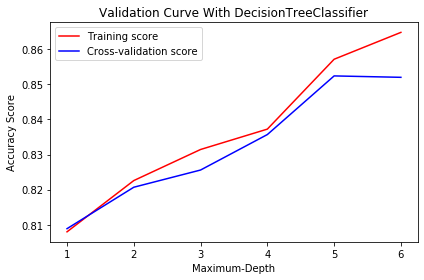

<h1>Confusion Matrix-Normalized</h1>

Confusion Matrix 
[[1513   90]
 [ 198  199]]


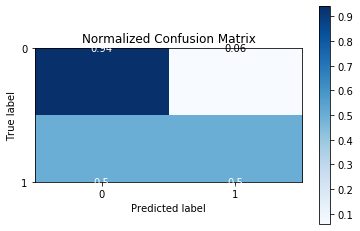


^
Expected {'graph' | 'digraph'}  (at char 0), (line:1, col:1)


<h1>Churned Pie After Training</h1>

<h3>Test Data</h3>

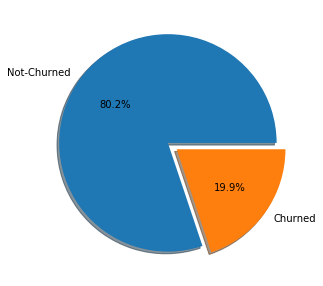

<h3>Predicted Data</h3>

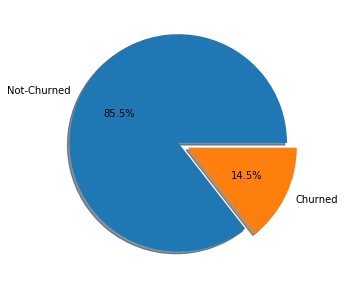

In [16]:
classifier_fun()